In [42]:
import sympy as sp
from scipy import *
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd
from sympy import Rational as R
import math

### Assignment 1

a)

i:  True. eig = 0 means free variable hence rank < n

ii.: True. Since nullspace is nonempty, so we get free variables, the system is consistent

iii: False. If $P(\lambda)=\operatorname{det}(A-\lambda I)$ does not have $n$ real roots, counting multiplicities (in other words, if it has some complex roots), then $A$ is not diagonalizable.

iv : False. It might be if the arithmetic multiplicity matches the geometric multiplicity, i.e. dim Nul $A-\lambda I = n$

v: True. There will always be a set of vectors that are orthogonal to each other.

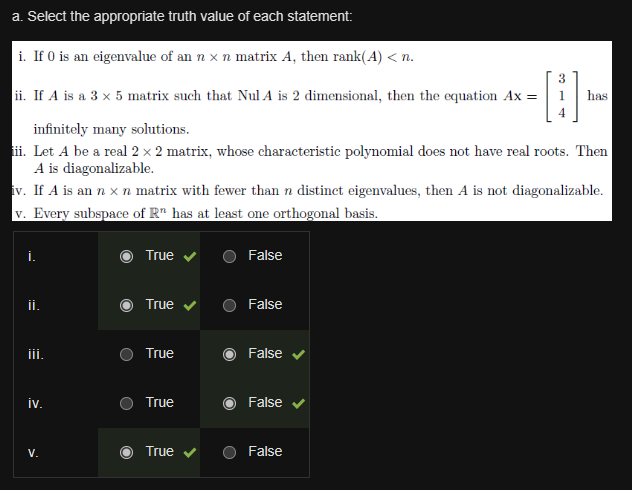

b)

Sum of diagonal of symmetric matrix = sum of eigenvalues, so $\lambda_1 + \lambda_2 + \lambda_3 = 56$. We substitute the information supplied: $\lambda_1 + \lambda_{1}^2 + 9\lambda_1 = 56$. Now we just solve:

In [43]:
l = symbols('lambda')
solve(l**2 + 10*l - 56, l)

We know $\lambda_1$ must be positive and use it to find the other values:

In [44]:
l1 = 4
l2 = l1**2 # Pow
l3 = 9*l1
display(l1, l2, l3)

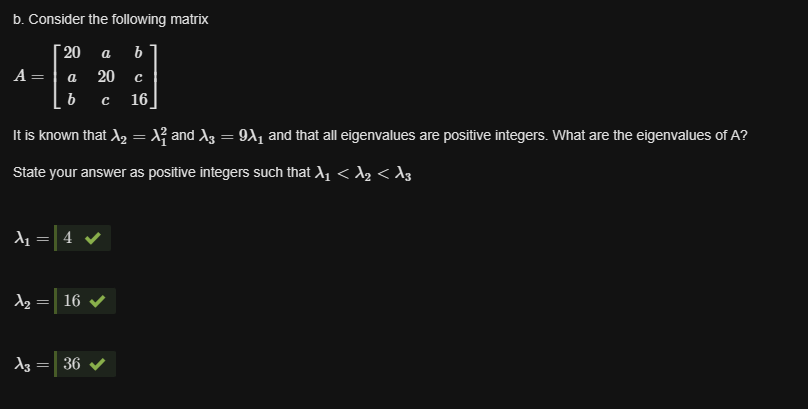

c)

So since we get distinct eigenvalues we know $A$ is diagonalizable. We are given the eigenvalues and eigenvectors and can simply set up the factorization:

In [45]:
P = Matrix([[3, 0, 1], [-3, 0, 1],[7, 1, 1]])
Pinv = P**-1
D = diag(3, 6, 7)
display(Math(r'A = ' + latex(P*D*Pinv)))

<IPython.core.display.Math object>

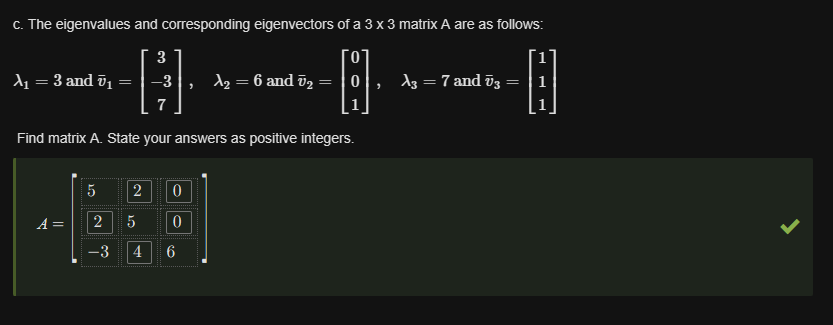

### Assignment 2

a)

So the eigenvalues are the roots of the characteristic polynomial which means that we check where the graph intersects the x-axis and get:

$$
\lambda_1 = -5 \\
\lambda_2 = 3 \\
\lambda_3 = 6 
$$

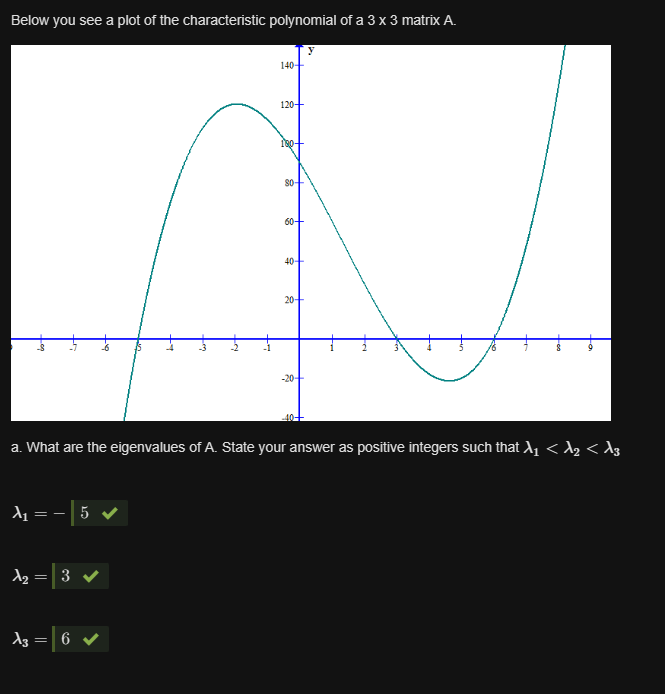

b) The determinant is the product of the eigenvalues:

In [46]:
display(Math(r'det(A) = ' + latex(-5*3*6)))

<IPython.core.display.Math object>

c)

Since $det(A)\neq 0$ $A$ has pivots in all columns which means no free variables which means an empty nullspace so dim Nul $A = 0$.

### Assignment 3

In [47]:
k = symbols('k')
A = Matrix([[1,1,0],[0,1,1],[0,0,1]])
B = Matrix([[2,0,0],[1,1,2],[2,0,1]])
C = Matrix([[1,1,0],[0,1,0],[0,1,2]])
D = Matrix([[k+1,1,0],[1,k+8,2],[4,1,k+2]])

a)
So here we must "isolate" matrix $X$, remembering all the rules of matrix algebra:

$$
XB = XA -X + C \\
XB - XA + X = C \\
X(B-A+I_3) = C \\
X = C(B-A+I_3)^{-1}
$$

We get:

In [48]:
X = C*(B-A+eye(3))**-1
display(Math(r'det(X)= ' + latex(det(X))))

<IPython.core.display.Math object>

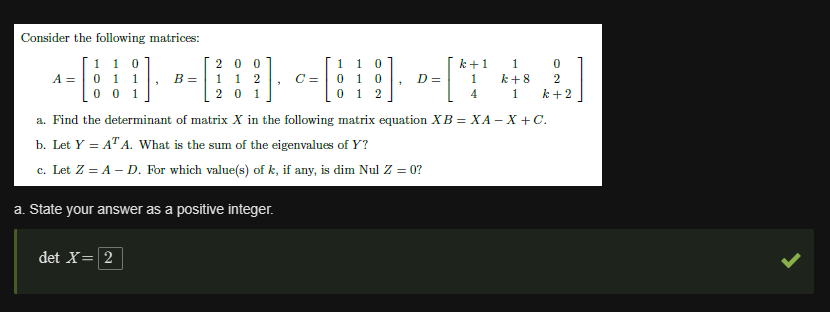

b)

Remember the sum of the eigenvalues of a symmetric matrix is always the sum of its diagonal (sum of diagonal is also called trace):

In [49]:
Y = A.T * A
Y

⎡1  1  0⎤
⎢       ⎥
⎢1  2  1⎥
⎢       ⎥
⎣0  1  2⎦

In [50]:
trace(Y)

c)

A lot of students had mistakes in this exercise. One student even asked me if it contained errors. You just need to think a little bit. Dim Nul Z = 0 means that the nullspace is empty. This only happens when there is a pivot in each column. A pivot in each column occurs when there is a non-zero value in all pivot positions:

In [51]:
Z = A-D
Z.echelon_form().expand()

⎡-1    -k - 7           -1        ⎤
⎢                                 ⎥
⎢       2                         ⎥
⎢0   - k  - 7⋅k         -k        ⎥
⎢                                 ⎥
⎢                   3      2      ⎥
⎣0       0       - k  - 8⋅k  - 6⋅k⎦

We really only need to look at the last row two rows. We now know that dim Nul Z = 0 when $-k^{3}-8k^{2}-6k \neq 0 \text{ and } -k^{2}-7k \neq 0 $

In [52]:
solve(-k**3-8*k**2-6*k, k), solve(-k**2-7*k, k)

So we just need to make sure that $k$ is **not** one of these values. That means that only three of the choices will make dim Nul Z = 0:

$$
k=-8-2 \sqrt{10} \approx-14.32 \\
k=-8+2 \sqrt{10} \approx-1.68  \\
k = 7
$$

(So kind of the "opposite" of what many answered).

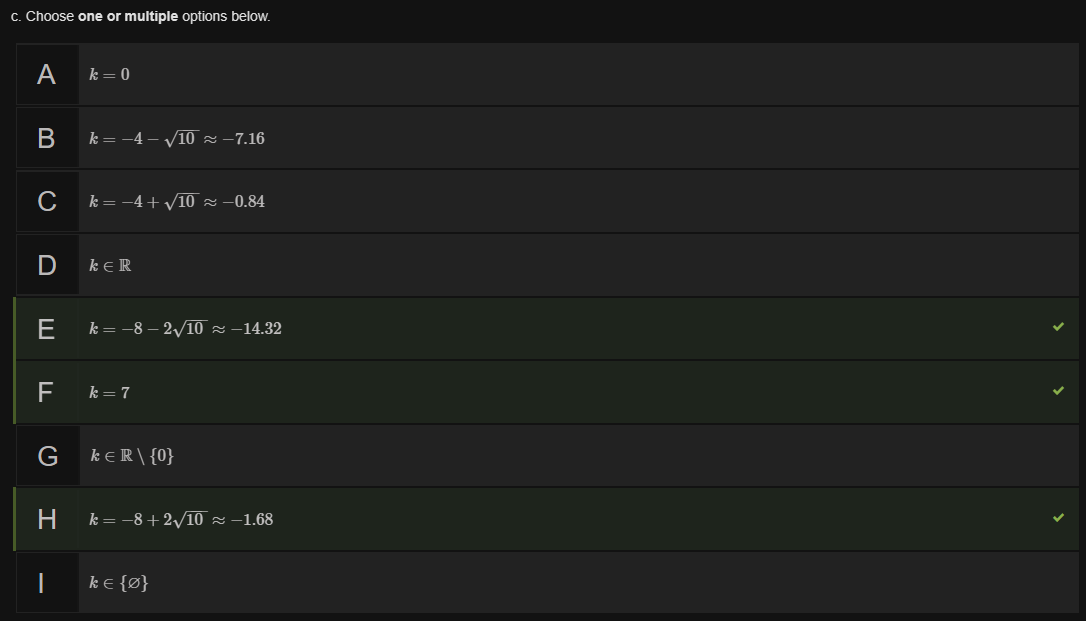

### Assignment 4

a)

In [53]:
A = Matrix([[-1, -2, 0, 1, -2, 2],
            [1, 2, 3, -5, 15, -11],
            [2, 4, 1, -1, 6, 7]])
A

⎡-1  -2  0  1   -2   2 ⎤
⎢                      ⎥
⎢1   2   3  -5  15  -11⎥
⎢                      ⎥
⎣2   4   1  -1  6    7 ⎦

b)

In [54]:
A.rref()[0]

⎡1  2  0  0  1   4⎤
⎢                 ⎥
⎢0  0  1  0  3   5⎥
⎢                 ⎥
⎣0  0  0  1  -1  6⎦

c) So this is simply derived from row reduced echelon form (b):

$$
\left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \\
x_{5}
\end{array}\right]=\left[\begin{array}{l}
4 \\
0 \\
5 \\
6 \\
0
\end{array}\right]+x_{2}\left[\begin{array}{l}
-2 \\
1 \\
0 \\
0 \\
0
\end{array}\right]+x_{5}\left[\begin{array}{l}
-1 \\
0 \\
-3 \\
1 \\
1
\end{array}\right]
$$

d) I prefer just rref'ing the coeeficient matrix and look at the output:

In [55]:
A[:,0:-1].rref()

⎛⎡1  2  0  0  1 ⎤           ⎞
⎜⎢              ⎥           ⎟
⎜⎢0  0  1  0  3 ⎥, (0, 2, 3)⎟
⎜⎢              ⎥           ⎟
⎝⎣0  0  0  1  -1⎦           ⎠

So we get the following info: 3 pivots, 2 free variables. There are 5 columns and 3 rows which leads us to

rank A is 3 since it is given by number of pivots

dim Nul A is 2 since it is given by number of free variables

Nul A is a subspace of $\mathbb{R}^5$ since there are five entries in the vectors of the nullspace (also see answer to (c)). In a $n\times m$ matrix the nullspace is a subspace of $\mathbb{R}^m$

Col A is a subspace of $\mathbb{R}^3$ since there are three entries in the vectors that make up the columns of $A$. In a $n\times m$ matrix the column space is a subspace of $\mathbb{R}^n$

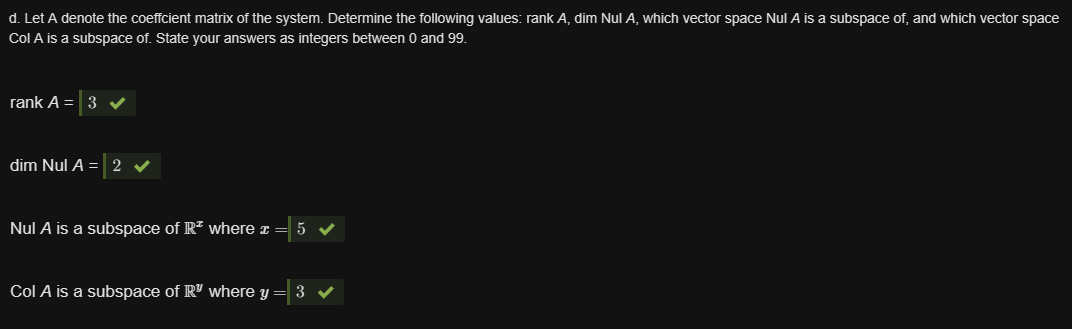

e)

We look at the output of the rref. Notice that the free variables are $a_2$ and $a_5$. That means that $a_2$ kan only be a linear combination of $a_1$ while $a_5$ can be a linear combination of $a_1$, $a_3$ and $a_4$. We can see what the combination for $a_2$ is by looking at the values in column 2 and similarly for column 5 and $a_5$. We get:

$a_2 = 2a_1$

$a_5 = a_1 + 3a_3 - a_4$

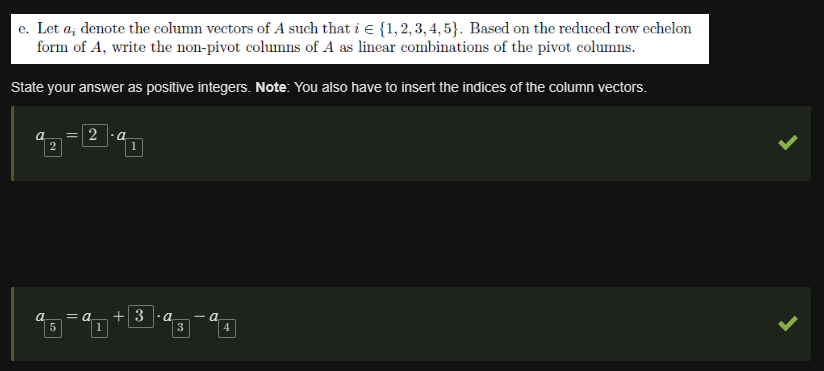

### Assignment 5

Very few had this one right. The method is simply set the two expressions equal to each other. Place the "intersections" on one side and the Matrices with their paramaters on the other side. We get:

$$
\left[\begin{array}{l}
2 \\
0 \\
0 \\
0
\end{array}\right]+\left[\begin{array}{rrr}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1 & 1 \\
0 & 0 & -1
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t
\end{array}\right] = \left[\begin{array}{l}
0 \\
1 \\
2 \\
3
\end{array}\right]+\left[\begin{array}{r}
-1 \\
2 \\
1 \\
0
\end{array}\right] u
$$

$$
\left[\begin{array}{rrr}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1 & 1 \\
0 & 0 & -1
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t
\end{array}\right] -
\left[\begin{array}{r}
-1 \\
2 \\
1 \\
0
\end{array}\right] u =
\left[\begin{array}{l}
0 \\
1 \\
2 \\
3
\end{array}\right] - \left[\begin{array}{l}
2 \\
0 \\
0 \\
0
\end{array}\right]
$$


We can now combine the left-hand sides in to one matrix since the two parts are merely linear combinations. Similarly we subtract the right-hand sides.

$$
\left[\begin{array}{rrr}
1 & 0 & 0 & 1 \\
-1 & 1 & 0 & -2\\
0 & -1 & 1 & -1\\
0 & 0 & -1 & 0\\
\end{array}\right]\left[\begin{array}{c}
r \\
s \\
t \\
u
\end{array}\right] =
\left[\begin{array}{l}
-2 \\
1 \\
2 \\
3
\end{array}\right]
$$

Now we just have a good-old system which we can solve by rref. This will give us the values for r, s, t, u:

In [56]:
Matrix([[1,0,0,1, -2],
        [-1,1,0,-2, 1],
        [0,-1,1,-1, 2],
        [0,0,-1,0, 3]]).rref()[0]

⎡1  0  0  0  0 ⎤
⎢              ⎥
⎢0  1  0  0  -3⎥
⎢              ⎥
⎢0  0  1  0  -3⎥
⎢              ⎥
⎣0  0  0  1  -2⎦

So now we just use the value of u and plug it in to W and get the values of the intersection:

In [57]:
Matrix([[0],[1],[2],[3]]) -2*Matrix([[-1],[2],[1],[0]])

⎡2 ⎤
⎢  ⎥
⎢-3⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣3 ⎦

In [58]:
# Same as above just in one go:
V = Matrix([[1,0,0],[-1,1,0],[0,-1,1],[0,0,-1]])
v = Matrix([[2],[0],[0],[0]])
W = Matrix([[-1],[2],[1],[0]])
w = Matrix([[0],[1],[2],[3]])

u = Matrix.hstack(V, -W, w-v).rref()[0][-1,-1]
w+W*u

⎡2 ⎤
⎢  ⎥
⎢-3⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣3 ⎦

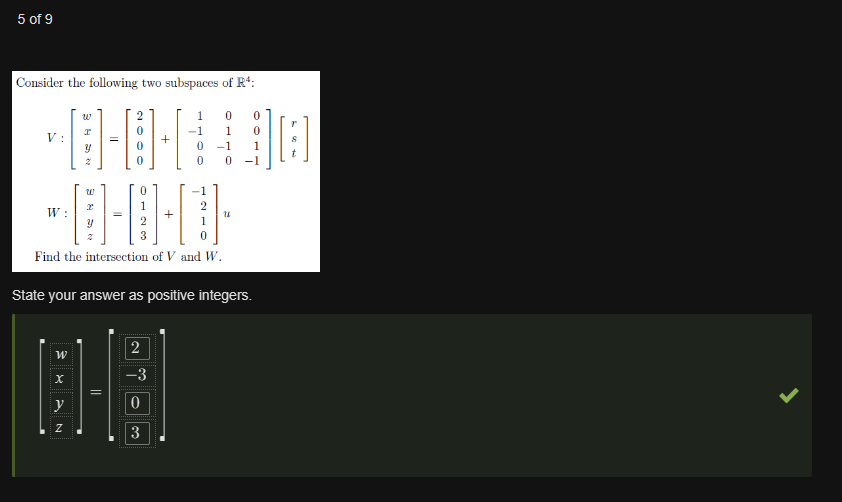

### Assignment 6

a)

Gram Matrix is the $A^T A$ matrix

In [59]:
v1 = Matrix([[1],[-1],[0],[1],[1]])
v2 = Matrix([[-1],[1],[2],[1],[1]])
v3 = Matrix([[3],[3],[0],[-3],[3]])
V = Matrix.hstack(v1, v2, v3)
V.T*V

⎡4  0  0 ⎤
⎢        ⎥
⎢0  8  0 ⎥
⎢        ⎥
⎣0  0  36⎦

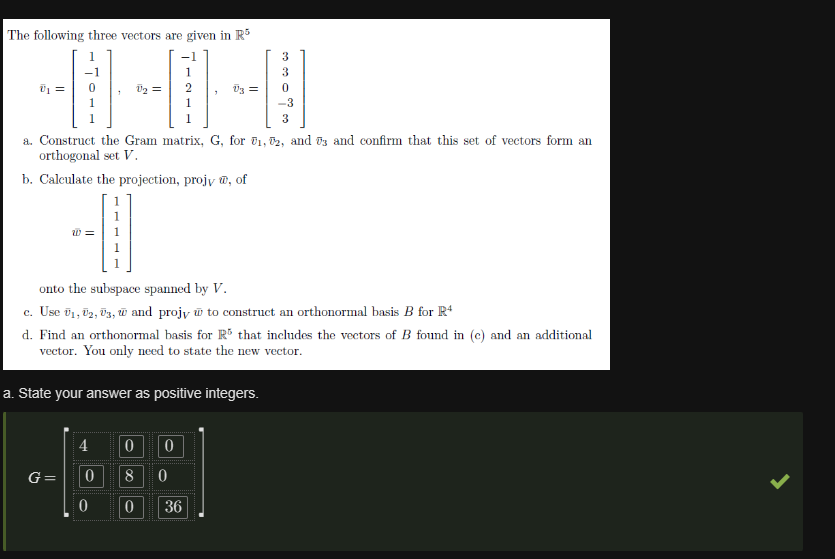

b)

We just use the built in formula:

In [60]:
w = Matrix([1,1,1,1,1])

proj = w.project(v1) + w.project(v2) + w.project(v3)
proj

⎡1/2⎤
⎢   ⎥
⎢1/2⎥
⎢   ⎥
⎢ 1 ⎥
⎢   ⎥
⎢1/2⎥
⎢   ⎥
⎣3/2⎦

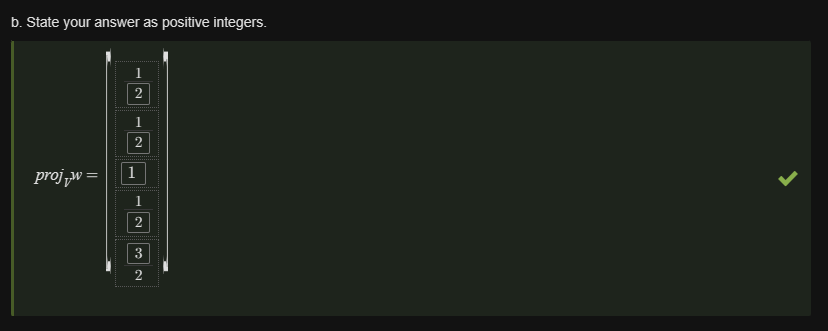

c)

So the orthonormal basis will simply be the normalised versions of $\bar{v}_1$, $\bar{v}_2$, $\bar{v}_3$, and $\bar{w} - \operatorname{proj}_{V} \bar{w}$

In [61]:
v4 = w-proj
display(Math(latex(v1.normalized()) + ' , ' 
             + latex(v2.normalized()) + ' , '
             + latex(v3.normalized()) + ' , '
             + latex(v4.normalized())))

<IPython.core.display.Math object>

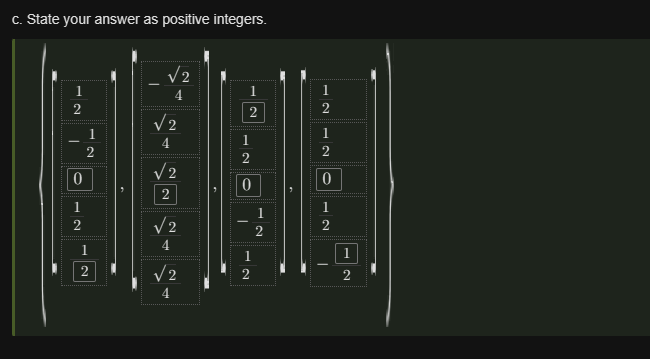

d)

So the last vector will be the orthogonal complement of the basis found in (c). We can determine this by using "the trick", i.e. find the nullspace of the transpose of the above basis:

In [62]:
Matrix.vstack(v1.T, v2.T, v3.T, v4.T).nullspace()[0].normalized()

⎡-√2 ⎤
⎢────⎥
⎢ 4  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎢ 4  ⎥
⎢    ⎥
⎢-√2 ⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎢ 4  ⎥
⎢    ⎥
⎢ √2 ⎥
⎢ ── ⎥
⎣ 4  ⎦

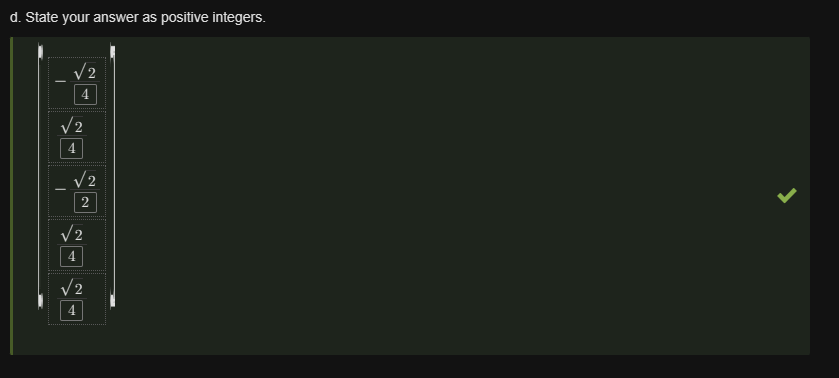

### Assignment 7
So we just use the formula which I went through in class.

In [63]:
A = Matrix([[4, -2, 1],
            [1, -1, 1],
            [1, 1, 1],
            [4, 2, 1]])
y = Matrix([5, 2, 0, 3])
AtA = A.T * A
Aty = A.T * y

Matrix.hstack(AtA, Aty).rref()[0][:,-1]

⎡ 1  ⎤
⎢    ⎥
⎢-3/5⎥
⎢    ⎥
⎣ 0  ⎦

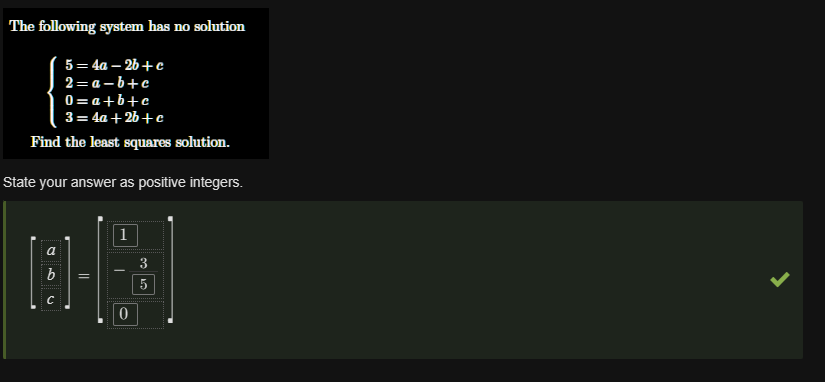

### Assignment 8

So we just need to use the formula which I derived in class to find the vectors of $V$. As we can see, we will be missing one vector. We can find this vector by using "the trick".

In [64]:
A = Matrix([[4,11,14],[8,7,-2]])
U = Matrix([[(3*sqrt(10))/(10),-(sqrt(10))/(10)],
            [(sqrt(10))/(10),(3*sqrt(10))/(10)]])

u1 = U[:,0]
u2 = U[:,1]

s1 = 6*sqrt(10)
s2 = 3*sqrt(10)

vt1 = s1**-1 * u1.T * A
vt2 = s2**-1 * u2.T * A

vt3 = Matrix.vstack(vt1, vt2).nullspace()[0].T.normalized()

Vt = Matrix.vstack(vt1, vt2, vt3)
V = Vt.T
V

⎡1/3  2/3   2/3 ⎤
⎢               ⎥
⎢2/3  1/3   -2/3⎥
⎢               ⎥
⎣2/3  -2/3  1/3 ⎦

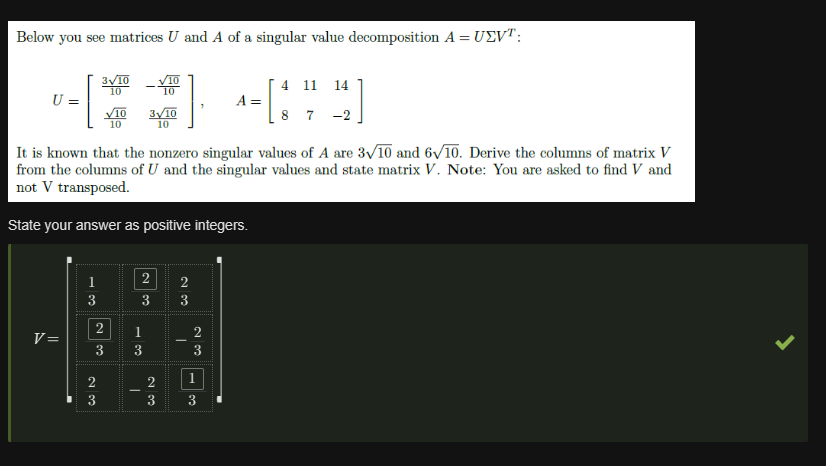

### Assignment 9

In total, 5 + 3 litres enter A, which means 8 must leave A from pipe c. If 8 enters B, 8 must leave, 3 from b and 5 from d. We get:

In [65]:
# We translate the problem to a matrix problem

A = Matrix([[-R(8,200), R(3,100)],[R(8,200), -R(8,100)]])
display(Math(r'A = ' + latex(A)))

<IPython.core.display.Math object>

In [66]:
# We find the eigenvalues and the corresponding eigenspaces.
l = symbols('l')
l1, l2 = solve(det(A-l*eye(np.shape(A)[0])))
display(Math(r'\lambda_0 =' +latex(l1) + r'\approx' + latex(round(l1, 2))))
display(Math(r'\lambda_1 =' +latex(l2) + r'\approx' + latex(round(l2, 2))))

v1 = (A-l1*eye(np.shape(A)[0])).nullspace()[0]
v2 = (A-l2*eye(np.shape(A)[0])).nullspace()[0]
display(Math(r'v_0 = '+ latex(v1) + r'=' + latex(v1.evalf(4))))
display(Math(r'v_1 = '+ latex(v2) + r'=' + latex(v2.evalf(4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We get the following general solution:

$$
y(0)=c_{0}\left[\begin{array}{c}
-\frac{1}{2} \\
1
\end{array}\right]e^{-\frac{t}{10}}+c_{1}\left[\begin{array}{l}
\frac{3}{2} \\
1
\end{array}\right]e^{-\frac{t}{50}}
$$

To get the particular solution (sometimes called the unique solution) we use the initial value and solve the above general solution with regard to $c_0$ and $c_1$.

In [67]:
y0 = Matrix([100, 50])
# To solve the system we form the following augmented matrix and solve. The c's will be in the last column:
rref = v1.row_join(v2).row_join(y0).rref()[0]
#rref.applyfunc(lambda x: round(x, 2)) # this I can use when the values are horrible!!
rref

⎡1  0  -25/2⎤
⎢           ⎥
⎣0  1  125/2⎦

In [68]:
C = rref[:,-1]
t = symbols('t')
y1 = C[0]*v1[0]*math.e**(l1*t) + C[1]*v2[0]*math.e**(l2*t)
y2 = C[1]*v1[1]*math.e**(l1*t) + C[1]*v2[1]*math.e**(l2*t)
z=limit(y1/y2,t,0)
float(z)

So we get:

$$
y(0)=-75\left[\begin{array}{c}
-\frac{1}{2} \\
1
\end{array}\right]e^{-\frac{t}{10}}+75\left[\begin{array}{l}
\frac{3}{2} \\
1
\end{array}\right]e^{-\frac{t}{50}}
$$

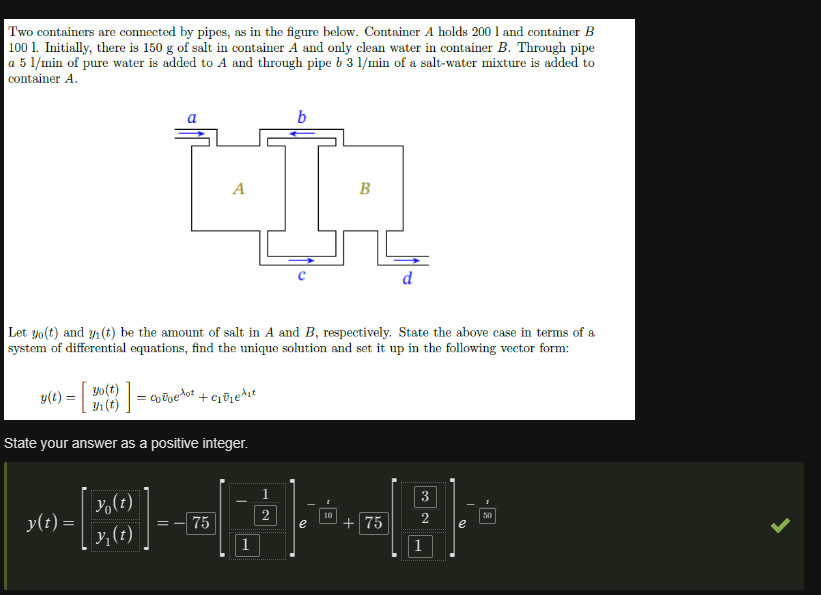